In [ ]:
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
from natsort import natsorted
from tqdm import tqdm

In [ ]:
!unzip "/content/Stereo_Images.zip"

Archive:  /content/Stereo_Images.zip
  inflating: Stereo Dataset/l1.png   
  inflating: Stereo Dataset/r1.png   
  inflating: Stereo Dataset/r2.png   
  inflating: Stereo Dataset/l2.png   
  inflating: Stereo Dataset/l3.png   
  inflating: Stereo Dataset/r3.png   


In [ ]:
Left_Image_List = [ Path(p) for p in natsorted( [ str(p) for p in list( Path( 'Stereo_Images' ).glob( r'**/l*' )) ])]
Right_Image_List = [ Path(p) for p in natsorted( [ str(p) for p in list( Path( 'Stereo_Images' ).glob( r'**/r*' )) ])]

*Load images and convert them to grayscale*

In [ ]:
Left_Image = {}
Right_Image = {}
for i in range( len( Left_Image_List ) ):
    Left_Image[i] = cv2.imread( str( Left_Image_List[i] ) , cv2.IMREAD_GRAYSCALE )
    Right_Image[i] = cv2.imread( str( Right_Image_List[i] ) , cv2.IMREAD_GRAYSCALE )

*Show images*

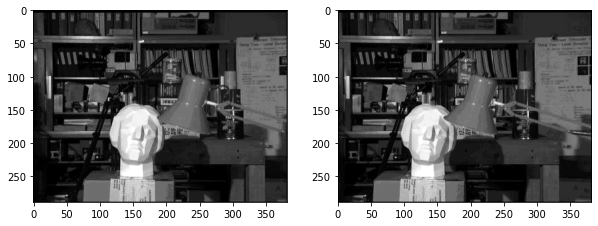

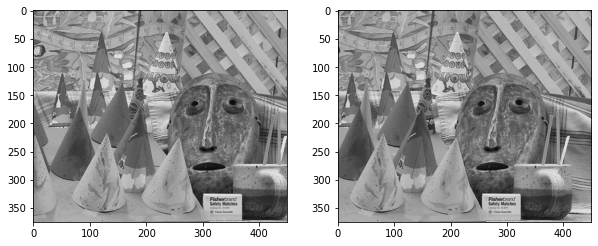

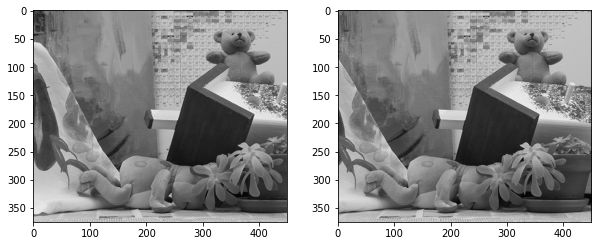

In [ ]:
for i in range( len( Left_Image_List ) ):
    plt.figure( figsize = ( 10, 10 ) )
    plt.subplot(1,2,1), plt.imshow( Left_Image[i], cmap='gray' )
    plt.subplot(1,2,2), plt.imshow( Right_Image[i], cmap='gray')

*Block Matching*

In [ ]:
def BlockMatching(right, left, window_size: int, sad_ssd :bool):

  gap = int( ( window_size - 1 ) / 2 )

  rows, columns = right.shape[ : ]

  result = np.zeros( ( rows, columns ) )


  for i in tqdm(range(gap, rows - gap)):

    for j in range(gap, columns - gap):

      #Inside window in right reference image

      window_right = right[ i - gap : i + gap + 1 , j - gap : j + gap + 1]

      #Array init for values of sad and ssd one array for each window in right image

      array = []

      # Can stop before tho :) or go crazy and loop on all pixels in this row

      step = min(columns - gap - j, int( columns / 8 ) )

      for shift in range( step ): 
        
        window_left = left[ i - gap : i + gap + 1 , j - gap + shift : j + gap + 1 + shift ]

        if(sad_ssd):

          # sum of abs diffrence 

          array.append( np.sum( np.abs( window_left - window_right ) ) )

        else:

          # sum of squared diffrence

          array.append( np.sum( ( window_left - window_right ) ** 2 ) )

      index = np.argmin( array )

      result[i][j] = index * 255 / int( columns / 8 )

  return result

**For window size of 1**

100%|██████████| 289/289 [00:44<00:00,  6.44it/s]


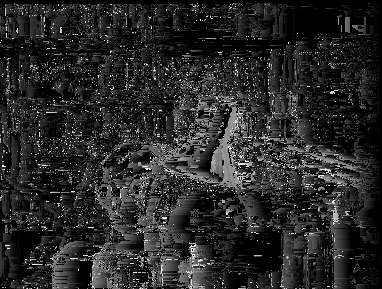

100%|██████████| 375/375 [01:21<00:00,  4.63it/s]


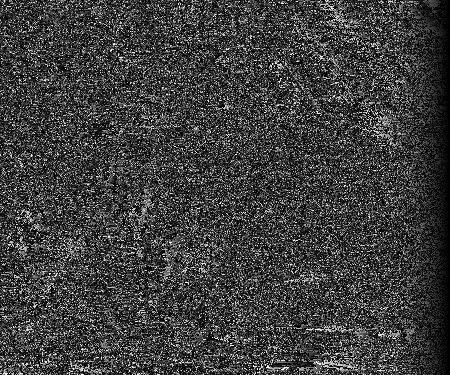

100%|██████████| 375/375 [01:21<00:00,  4.60it/s]


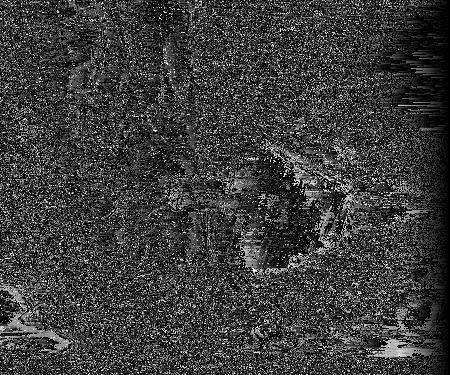

In [ ]:
for i in range(3):
      img3 = BlockMatching(Right_Image[i],Left_Image[i],1,False)
      cv2_imshow(img3)

**For window size of 5**

100%|██████████| 285/285 [00:49<00:00,  5.78it/s]


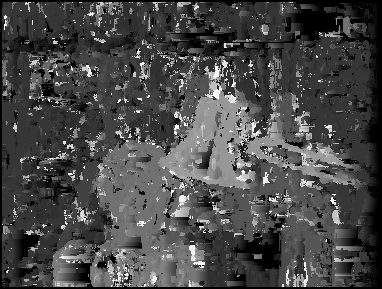

100%|██████████| 371/371 [01:27<00:00,  4.23it/s]


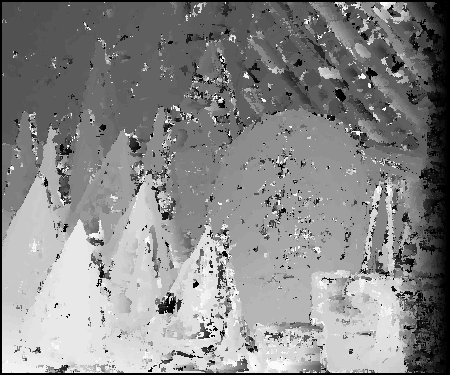

100%|██████████| 371/371 [01:28<00:00,  4.20it/s]


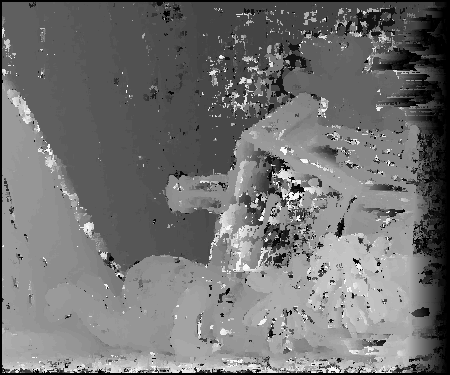

In [ ]:
for i in range(3):
     img4 = BlockMatching(Right_Image[i],Left_Image[i],5,False)
     cv2_imshow(img4) 

**For window size of 9**

100%|██████████| 281/281 [00:48<00:00,  5.81it/s]


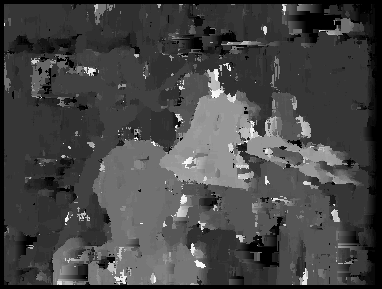

100%|██████████| 367/367 [01:27<00:00,  4.19it/s]


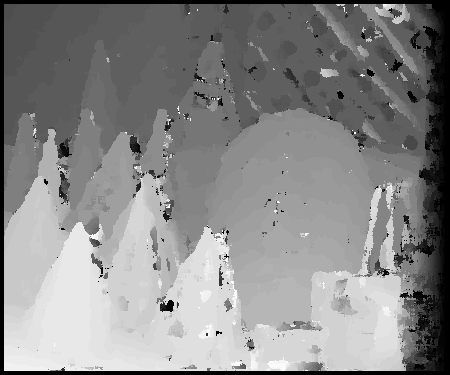

100%|██████████| 367/367 [01:27<00:00,  4.19it/s]


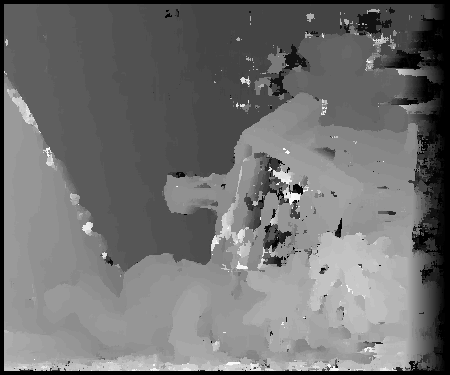

In [ ]:
for i in range(3):
     img5 = BlockMatching(Right_Image[i],Left_Image[i],9,False)
     cv2_imshow(img5)